In [1]:
# Data Wrangling 
import numpy as np
import pandas as pd 

# Data Visualisation 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning 
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [2]:
train = pd.read_csv("train.csv")
train

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1


In [3]:
test = pd.read_csv("test.csv")
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [4]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

In [5]:
print(train.columns)

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')


In [6]:
len(test)

34224

In [7]:
len(train)

79853

In [8]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
dtype: object

In [9]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [10]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [11]:
#df.info

In [12]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [13]:
train['residence_area_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


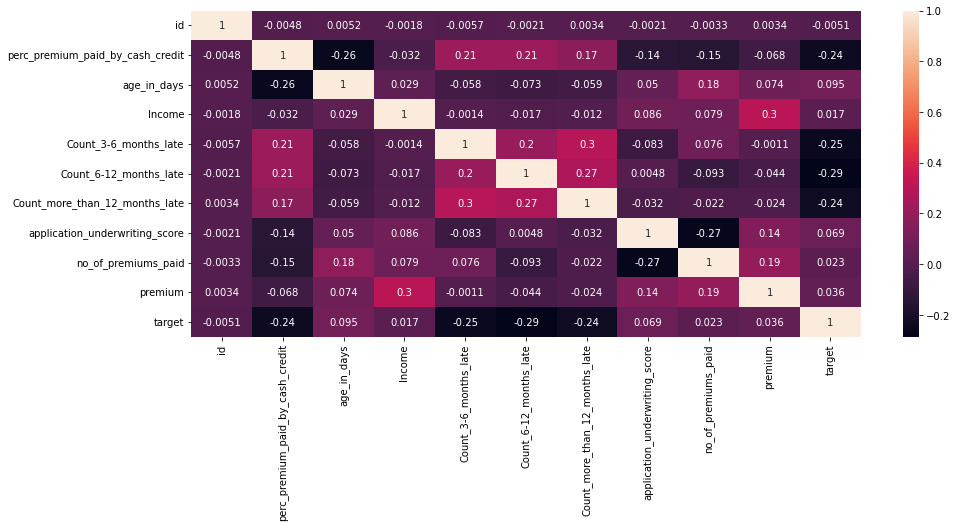

In [15]:
plt.figure(figsize = (15, 6))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [16]:
add = [train, test]

In [17]:
train['Income']

0        355060
1        315150
2         84140
3        250510
4        198680
          ...  
79848    224550
79849    279150
79850    305020
79851     39330
79852    280140
Name: Income, Length: 79853, dtype: int64

In [18]:
train['perc_premium_paid_by_cash_credit'] 

0        0.429
1        0.010
2        0.917
3        0.049
4        0.052
         ...  
79848    0.425
79849    0.704
79850    0.000
79851    0.398
79852    0.550
Name: perc_premium_paid_by_cash_credit, Length: 79853, dtype: float64

In [19]:
train['age_in_days']

0        12058
1        21546
2        17531
3        15341
4        31400
         ...  
79848    23367
79849    19356
79850    23372
79851    22641
79852    15709
Name: age_in_days, Length: 79853, dtype: int64

In [20]:
train['age_in_days']

0        12058
1        21546
2        17531
3        15341
4        31400
         ...  
79848    23367
79849    19356
79850    23372
79851    22641
79852    15709
Name: age_in_days, Length: 79853, dtype: int64

In [21]:
for dataset in add: 
    dataset['age'] = dataset['age_in_days']//365
    dataset.drop(['age_in_days'], axis = 1, inplace = True)
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86


In [22]:
test.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,649,0.001,51150,0.0,0.0,0.0,99.89,7,A,Rural,75
1,81136,0.124,285140,0.0,0.0,0.0,98.93,19,A,Urban,65
2,70762,1.000,186030,0.0,0.0,0.0,NaN,2,B,Urban,47
3,53935,0.198,123540,0.0,0.0,0.0,99.00,11,B,Rural,44
4,15476,0.041,200020,1.0,0.0,0.0,99.17,14,A,Rural,29


# Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


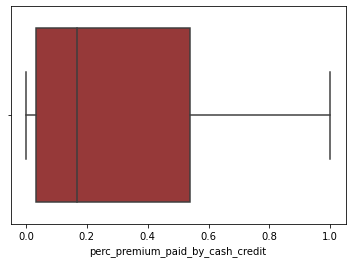

In [23]:
# Plotting boxplot for 'perc_premium_paid_by_cash_credit' column using the 'seaborn' library:
sns.boxplot(train['perc_premium_paid_by_cash_credit'],color='brown')
plt.show()

In [24]:
train['age']

0        33
1        59
2        48
3        42
4        86
         ..
79848    64
79849    53
79850    64
79851    62
79852    43
Name: age, Length: 79853, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


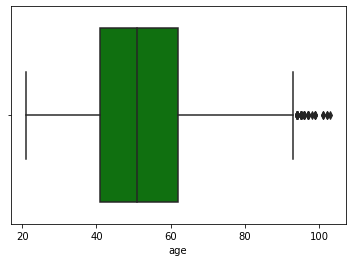

In [25]:
# Similarly another example of a boxplot representing the 'age_in_days' column:
sns.boxplot(train['age'],color='green')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


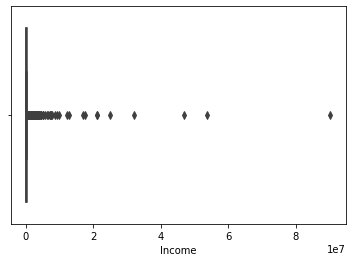

In [26]:
# One more example of boxplot reading is as follows:
sns.boxplot(train['Income'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


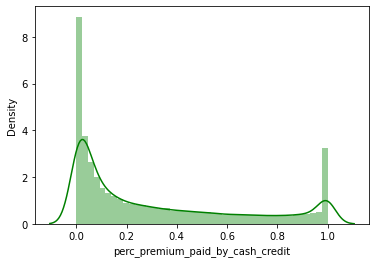

In [27]:
# Plotting the distribution of the 2nd column of train dataset using Histogram:
sns.distplot(train['perc_premium_paid_by_cash_credit'],color='green')
plt.show()

This is almost a right-skewed distribution. But it also looks like a little bimodal distribution as there's a small peak at the extreme right as well. But what this really shows is that the percentage of premium amount paid by cash or credit card by maximum customers is around 0. While the percentage of premium amount paid by cash or credit card by a few amount of customers is around 1. This means the mode of the distribution is 0. Let me check it using 'mode' function also:

In [28]:
train['perc_premium_paid_by_cash_credit'].mode()

0    0.0
Name: perc_premium_paid_by_cash_credit, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


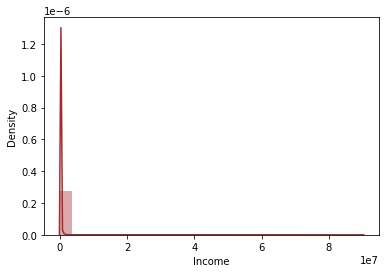

In [29]:
# Checking the 'income' distribution:
sns.distplot(train['Income'],color='brown',bins = 25)
plt.show()

This is extremely right skewed distribution. So to make some sense out of this data I'll have to use variable transformation. For this I'll take logarithm of the Income data & then plot its distribution. Now is the time to import 'numpy' library:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


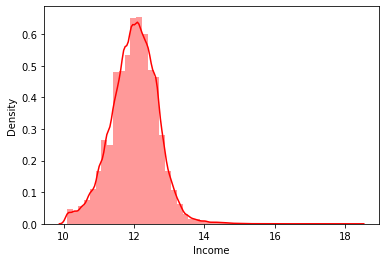

In [30]:
# Importing numpy library:
import numpy as np
# Now taking logarithm of the Income data and then plotting its distribution:
sns.distplot(np.log(train["Income"]),color='red')
plt.show()

In [31]:
# This seems a better distribution. I can read it now & tell various statistics about it. The min & max are 10 & 14 respectively
# Also it looks like the mode is 12. Let's confirm it using mode function:
np.log(train['Income']).mode()

0    11.919257
Name: Income, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


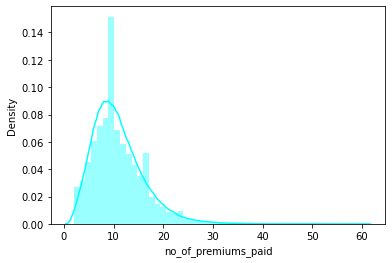

In [32]:
# Now I'll check distribution for another 'int' variable named 'no_of_premiums_paid':
sns.distplot(train['no_of_premiums_paid'],color='cyan')
plt.show()

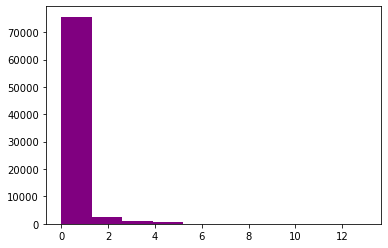

In [33]:
# Now I'll check the 'Count_3-6_months_late' column distribution:
plt.hist(train['Count_3-6_months_late'],histtype='stepfilled',label=str,color='purple',bins=10)
plt.show()

Notice from the distribution plot that although the 'Count_3-6_months_late' variable is considered float by python but it is actually an int variable as it has discrete values & not continuous! It reminds me of categorical variable. So now is the time I introduce the categorical variables & their analysis:

The categorical variables are discrete in nature & are stored as 'object' datatype. During the Univariate analysis of categorical variables, the task is to look for 'count' and 'count%'.

Count gives the absolute frequency of each category in a categorical variable. While Count% shows the proportion of different categories in a categorical variable, expressed as %.

To analyse categorical variables the plotting methods used are frequency table & barplots. I'll make a frequency table now:

In [34]:
train['Count_3-6_months_late'].value_counts()


0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

This shows the various 'categories' in 'Count_3-6_months_late' column. For instance, the 1st category tells that there are 66801 customers on the train dataset who don't have any number of premiums late by 3-6 months. But many of them are on either 'Count_6-12_months_late column' or on 'Count_more_than_12_months_late' column. This means they have some premiums due in 6-12month and/or more than 12 months categories. To be more clear with the frequency table, notice that there are 8826 customers who have 1 premium late by 3-6 months. For another example, 4 customers have 9 premiums late by 3-6 months. Finally there's 1 customer who has as much as 10 premiums late by 3-6 months! That's a lot!

Similar counts can be seen for 6-12 months and more than 12 months categories as follows:

In [35]:
train['Count_6-12_months_late'].value_counts()


0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
11.0        2
14.0        2
13.0        2
17.0        1
15.0        1
12.0        1
Name: Count_6-12_months_late, dtype: int64

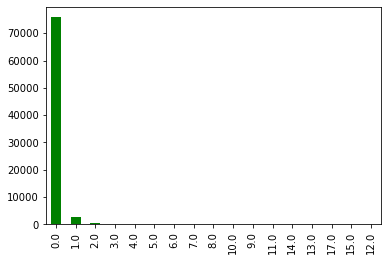

In [36]:
# I'll plot the barplot for Count_6-12_months_late variable to visualize the above frequency plot:
train['Count_6-12_months_late'].value_counts().plot.bar(color='green')
plt.show()

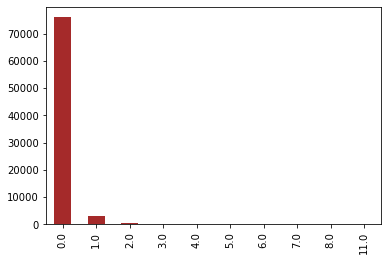

In [37]:
# Similarly for 'Count_more_than_12_months_late' column:
train['Count_more_than_12_months_late'].value_counts().plot.bar(color='brown')
plt.show()

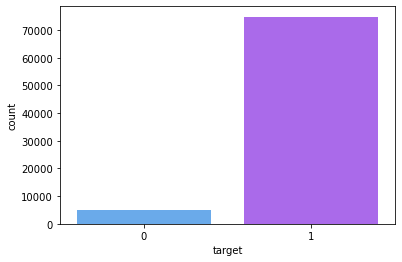

In [38]:
sns.countplot(data = train , x = 'target',palette = 'cool')
plt.show()

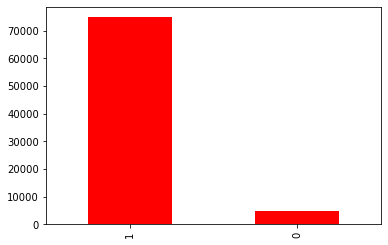

In [39]:
# I'll now visualize the 'target' data to check how many customers paid the premium on time:
train['target'].value_counts().plot.bar(color ='red')
plt.show()


In [40]:
# But this plot doesn't quite explain the actual figures. So I'll check it using the value_counts function:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64


Okay so 74855 customers paid their premium on time. Only 4998 customers didn't pay their premium on time. Till now I've been examining a single variable at a time. Now I'll examine two variables at a time:

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


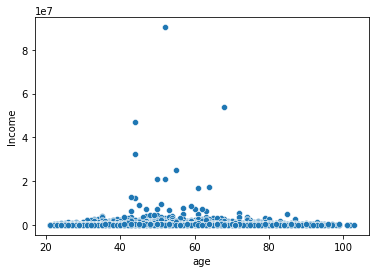

In [41]:
# For this analysis I'll use scatter plot:
sns.scatterplot(train['age'],train['Income'])
plt.show()

Majority of the customers earn income less than Rupees 1x10^7 (1 crore) monthly.
Few anomalies are present in the income as some customers do earn a lot ranging from Rs 1 crore to Rs 9 crore monthly!
The age range of these highly earning individuals lie between 41 months to 68 months.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


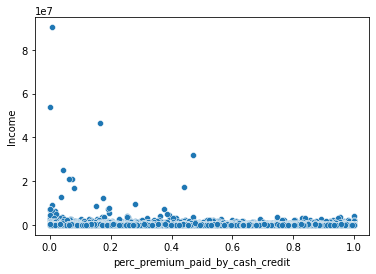

In [42]:
# Now I'll see the relation between income of customers and the number of premium they pay by cash or credit card:
sns.scatterplot(train['perc_premium_paid_by_cash_credit'],train['Income'])
plt.show()

This plot shows the following:

The customers who earn less than Rs 1 crore monthly as salary pay 0 to 100 % of their premium by either cash or credit card.
The high income customers pay in range 0% to 50% of their premium by either cash or credit card.
The customer who earns around 9 crore a month pays 0% premium either by cash or credit card.
The customer who earns around 5 crore a month pays 20% premium by cash or credit card.
The customer who earns over 3 crore a month pays 50% premium by cash or credit card.
It seems the high income group must be using some other means to pay majority of their premium.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


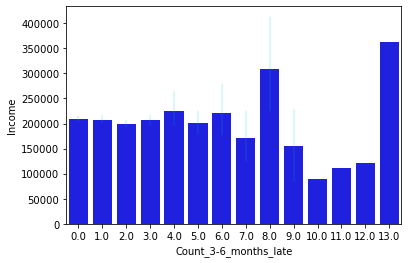

In [43]:
# I'll start with income of customers & how many premiums they are late by 3-6 months:
sns.barplot(train['Count_3-6_months_late'],train['Income'],color='b',errcolor='c',errwidth='.26')
plt.show()

The black vertical lines on the tip of some bars represent uncertainty in the data. Anyway, this plot shows the following:

All the customers who are late to pay their premiums by 3-6 months earn below Rs 4,00,000 (4 Lakhs) a month.
Some customers who earn around Rs 3,50,000 a month but still they are as much as 13 premiums late by 3-6 months.
Some customers who earn Rs 3 Lakh a month are 8 premiums late by 3-6 months.
Some customers who earn Rs 2 Lakh a month are 0 premiums late.
Some customers who earn little less than Rs 1 Lakh per month are upto 10 premiums late.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


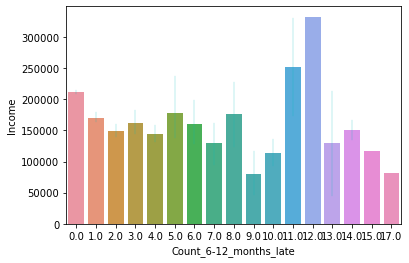

In [44]:
# I'll check the similar relation between Income & 6-12 month late category:
sns.barplot(train['Count_6-12_months_late'],train['Income'],errcolor='c',errwidth='.26')
plt.show()

This plot shows that only those customers who earn Rs 4 lakh & less are in the 6-12 months late category. There are some customers who earn around Rs 75,000 are as much as 17 premiums late by 6-12 months. This category shows even more late-payers than previous category. Let me see the next category to find if there are even more in it than these two categories:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


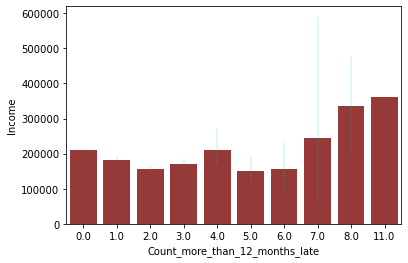

In [45]:
# Checking the relation between Income of customers & how many premiums they are late by 12 months or more:
sns.barplot(train['Count_more_than_12_months_late'],train['Income'],color='brown',errcolor='c',errwidth='.26')
plt.show()

So this gives a sigh of relief that there are customers in this category who are atleast not more than 11 premium late unlike the previous category. Some customers who earn around Rs 3,50,000 are 11 premiums late by more than 12 months. And the similar story is told here.

One thing is clear from above 3 plots though that the customers who earn more than Rs 4 lakh a month have been paying their premiums on time. So the insurance company should not be worried atleast about all the rich customers as they seem to be sticking around with the company in near future. Great news! :D



In [46]:
# I'm starting with 'target' & 'residence' columns:
pd.crosstab(train['target'],train['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0,1998,3000
1,29672,45183


This two-way table is displaying the following:

The number of customers from both rural & urban residence area type who didn't pay their premium on time & also those who payed their premium on time.
The number 0 on the target column represents those customers who didn't pay their premium on time.
The number 1 on the target column represents the customers who paid their premium on time.
The Rural column is showing that there are 1,998 rural customers of the insurance company who didn't pay their premiums on time. Whereas 29,672 rural customers paid their premiums on time.
The urban column is showing that there are 3,000 urban customers who didn't pay their premiums on time. On the other hand, there are 45,183 urban customers of the insurance company who paid their premium on time.

Now I'll check the relation between the 'Sourcing channel' & residence area type to see if residents of the two area types prefer different types of sourcing channel:

In [47]:
pd.crosstab(train['residence_area_type'],train['sourcing_channel'])


sourcing_channel,A,B,C,D,E
residence_area_type,,,,,
Rural,17115,6506,4780,2999,270
Urban,26019,10006,7259,4560,339


This shows the following:

17,115 rural customers prefer the sourcing channel A, whereas 26,019 urban customers prefer channel A.
6,506 rural customers prefer the sourcing channel B, whereas 10,006 urban customers prefer channel B.
4,780 rural customers prefer the sourcing channel C, whereas 7,259 urban customers prefer channel C.
2,999 rural customers prefer the sourcing channel D, whereas 4,560 urban customers prefer channel D.
270 rural customers prefer the sourcing channel E, whereas 339 urban customers prefer channel E.

In [48]:
# Now I'll see in what proportion they prefer a specific sourcing channel:
train['sourcing_channel'].value_counts()/len(train['sourcing_channel'])

A    0.540168
B    0.206780
C    0.150765
D    0.094661
E    0.007627
Name: sourcing_channel, dtype: float64

 So 54% of total customers prefer channel A, 20.67% customers prefer channel B, 15% customers prefer channel C, and so on. Clearly A is the most preferred channel whereas E is the least preferred channel among the customers

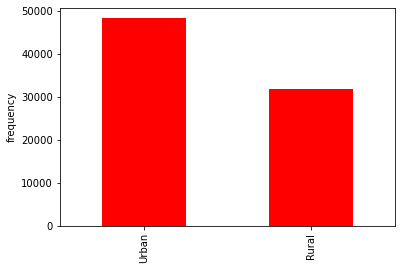

In [49]:
# Now I want to see how many customers of this company live in urban area type & how many of them live in rural area:
train['residence_area_type'].value_counts().plot.bar(ylabel = "frequency",color ="r")
plt.show()

So the company has 48,183 urban customers & 31,670 rural customers. Now I'll have to see what percentage of total customers are urban/rural:

In [50]:
pd.crosstab(train['no_of_premiums_paid'],train['target'])


target,0,1
no_of_premiums_paid,,
2,215,511
3,235,1511
4,271,2636
5,325,3890
6,319,5316
7,379,6244
8,371,6813
9,351,6807
10,326,6547


In [51]:
# Now I'm moving on to check relationship between 'residence area type' & 'count 3-6 months late' columns:
pd.crosstab(train['residence_area_type'],train['Count_3-6_months_late'])

Count_3-6_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
residence_area_type,,,,,,,,,,,,,,
Rural,26567,3425,996,402,140,62,27,7,9,3,1,0,1,0
Urban,40234,5401,1523,552,234,106,41,16,6,1,0,1,0,1


40,234 urban customers & 26,567 rural customers have 0 premiums due by 3-6 months.
5,401 urban customers & 3,425 rural customers have 1 premium due to pay by 3-6 months.
106 urban customers & 62 rural customers are 5 premiums late by 3-6 months.
1 urban customer & no rural customer is 13 premiums late by 3-6 months.

In [52]:
# Similarly I'm checking relationship between 'residence area type' & 'count 6-12 months late' columns:
pd.crosstab(train['residence_area_type'],train['Count_6-12_months_late'])

Count_6-12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0
residence_area_type,,,,,,,,,,,,,,,,,
Rural,30039,1110,271,130,55,14,11,4,2,1,1,0,1,0,1,0,0
Urban,45792,1570,422,187,75,32,15,7,3,3,3,2,0,2,1,1,1


Here 3 urban & 1 rural customers are late by 10 premiums, 2 urban customers are late by 13 premiums, 1 urban & 1 rural customers are late by 14, 1 urban customer is late by as much as 17 premiums by 6-12 months, etc

In [53]:
# Finally the relation between residence area type & 'count more than 12 months' columns:
pd.crosstab(train['residence_area_type'],train['Count_more_than_12_months_late'])


Count_more_than_12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
residence_area_type,,,,,,,,,,
Rural,30135,1209,217,58,14,4,2,0,1,0
Urban,45903,1787,281,93,34,9,4,3,1,1


This table shows that the in 'more than 12 month' category, the maximum number of premiums late by an urban customer is 11. While the maximum number of premiums late by a rural customer is 8.

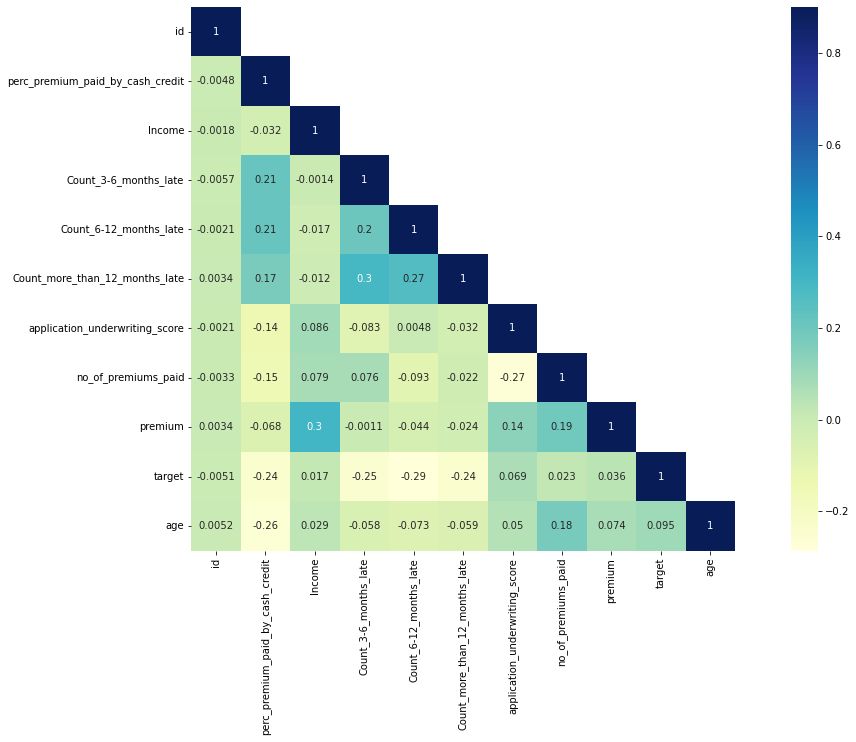

In [54]:
corr= train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu')
plt.show()

# Missing value Analysis

There may be missing or empty values in the dataset due to either error in data collection or due to some error in reading data. Also, since 'income' is involved in this dataset so there may be some customers who may not be willing to reveal their true income. Whatever the reason, I'll have to investigate for the missing values because I have to train my model from the 'train' dataset to predict the 'target' values in the 'test' dataset. So if I leave the missing values in the 'train' dataset and train my model the predictions of test dataset may get highly affected. Resulting in totally wrong prediction results.

In [55]:
# Firstly, checking the missing values in the whole train dataset using 'isnull' function:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
age                                    0
dtype: int64

This is telling the following:

There are 97 missing values in Count_3-6_months_late column
There are 97 missing values in Count_6-12_months_late column
There are 97 missing values in Count_more_than_12_months_late column
There are 2,974 missing values in application_underwriting_score column
No other column in the dataset has any missing value.

In [56]:
# So, filling 0 as missing values using 'fillna' function in all 3 'Count' columns:
train['Count_3-6_months_late'].fillna(0,inplace=True)
train['Count_6-12_months_late'].fillna(0,inplace=True)
train['Count_more_than_12_months_late'].fillna(0,inplace=True)

In [57]:
# Filling up missing values in 'application_underwriting_score column' with the mean of this column:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(),inplace=True)

In [58]:
# Verifying if all missing values got filled up or not:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
target                              0
age                                 0
dtype: int64

In [59]:
# Checking if 'test' dataset has any missing values:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
age                                    0
dtype: int64

In [60]:
# Yes it does! And it has missing values on same columns as train dataset.
# So I'll do the same filling on the test dataset as done on train dataset:
test['Count_3-6_months_late'].fillna(0,inplace=True)
test['Count_6-12_months_late'].fillna(0,inplace=True)
test['Count_more_than_12_months_late'].fillna(0,inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(),inplace=True)

In [61]:
# Verifying missing values in test dataset:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
age                                 0
dtype: int64

In [62]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target', 'age'],
      dtype='object')

In [63]:
train_1 = train.drop(columns  = 'premium',axis = 1)
train_1

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,224550,1.0,0.0,0.0,98.70,19,B,Urban,1,64
79849,59012,0.704,279150,1.0,0.0,1.0,99.42,12,A,Rural,1,53
79850,77050,0.000,305020,0.0,0.0,0.0,98.89,12,A,Rural,1,64
79851,67225,0.398,39330,0.0,0.0,0.0,98.68,8,A,Rural,1,62


In [64]:
train_1.shape

(79853, 12)

In [65]:
test.shape

(34224, 11)

# Traning Model

The scikit learn algorithms take two separate arguments. This means they need independent variables separately & the dependent variable (or target variable) separately. But since in the train dataset both independent & dependent variables are present together so I need to separate them out.

Firstly, I'll create a set of independent variables from the train dataset. So I'm dropping the 'target' variable from it using axis=1. This axis=1 specifies that the drop shall happen from the column. I'll store this set in an object called "x" as follows:



In [66]:
x = train_1.drop('target',axis=1)

In [67]:
x.shape

(79853, 11)

Now I need my separate target variable. So keeping only the 'target' variable in an object y:

In [68]:
y = train_1['target']

In [69]:
from sklearn.model_selection import train_test_split

This split function accepts an independent variable 'x' & a dependent variable 'y', and then split them into two parts. First is independent variable for train and independent variable for test. And then dependent variable for train and dependent variable for test. I'm naming them as train_x, test_x, train_y & test_y sets respectively as follows:

In [70]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=11111, shuffle=True, train_size= 0.8)

In [71]:
#train_y

In the brackets there are various parameters. During the scoring stage, these parameters can be adjusted to get the best model score or accuracy.

One thing about sklearn is that it needs input in terms of numbers only. ie; either as int datatype or as float datatype. This means sklearn doesn't take string as input. So to get rid of strings I need to create numeric features out of these categorical or string features. So I'll now use a concept called "Dummification" where I'll create dummies of variable.

In [72]:
# Creating dummies of both train_x and test_x sets:
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

In [73]:
train_x

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,age,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
53195,103837,0.181,69080,0.0,0.0,0.0,99.69,5,61,1,0,0,0,0,1,0
38742,34145,0.897,258100,0.0,0.0,0.0,98.20,17,53,0,1,0,0,0,0,1
40847,71540,0.000,222520,0.0,0.0,0.0,98.96,17,49,1,0,0,0,0,0,1
47734,26036,0.260,150120,0.0,0.0,0.0,99.13,10,46,0,0,0,1,0,0,1
24875,38655,0.001,367540,0.0,0.0,0.0,99.23,11,45,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,65716,0.149,300050,0.0,0.0,0.0,99.45,12,64,1,0,0,0,0,0,1
45084,74850,0.573,120120,0.0,0.0,0.0,99.17,8,56,1,0,0,0,0,0,1
38591,51138,0.031,134230,0.0,0.0,0.0,99.82,9,82,1,0,0,0,0,0,1
2740,81915,0.121,112640,1.0,0.0,0.0,98.46,29,58,1,0,0,0,0,0,1


In [74]:
train_x.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'age', 'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E', 'residence_area_type_Rural',
       'residence_area_type_Urban'],
      dtype='object')

In [75]:
#train_x['sourcing_channel_C'].unique()

In [76]:
test_x.shape

(15971, 16)

In [77]:
train_y.value_counts()/len(train_y)


1    0.93632
0    0.06368
Name: target, dtype: float64

In [78]:
test_y.value_counts()/len(test_y)


1    0.941769
0    0.058231
Name: target, dtype: float64

# Logistic Regression 

In [79]:
from sklearn.linear_model import LogisticRegression


In [80]:
logr = LogisticRegression(n_jobs=1,max_iter=100,random_state=11111)

In [81]:
logr.fit(train_x,train_y)

LogisticRegression(n_jobs=1, random_state=11111)

Scikit learn provides a function called "score" which can be used to check the performance of my model. This shows the accuracy for how well my model fits. It takes 2 arguments one independent variable & one dependent variable. I'll use this function 1st on train_x & train_y and then on test_x & test_y as follows:

In [82]:
logr.score(train_x,train_y)


0.9363200901662441

In [83]:
logr.score(test_x,test_y)


0.9417694571410682

In [128]:
from sklearn.metrics import precision_score, recall_score
s = logr.predict(test_x)
# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(test_y, s)
recall = recall_score(test_y, s)
print("precision:", precision)
print("recall :" ,recall )

precision: 0.9417694571410682
recall : 1.0


In [84]:
test

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,649,0.001,51150,0.0,0.0,0.0,99.890000,7,A,Rural,75
1,81136,0.124,285140,0.0,0.0,0.0,98.930000,19,A,Urban,65
2,70762,1.000,186030,0.0,0.0,0.0,99.061898,2,B,Urban,47
3,53935,0.198,123540,0.0,0.0,0.0,99.000000,11,B,Rural,44
4,15476,0.041,200020,1.0,0.0,0.0,99.170000,14,A,Rural,29
...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,110240,0.0,0.0,0.0,97.520000,9,A,Urban,57
34220,30326,0.157,125090,0.0,0.0,0.0,99.620000,7,A,Rural,53
34221,65749,0.325,196570,0.0,0.0,0.0,98.580000,14,B,Rural,50
34222,65686,0.983,212150,1.0,0.0,1.0,98.880000,10,A,Urban,46


In [85]:
test_predict= pd.get_dummies(test) ##encoding categorical features


In [86]:
test_predict

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,age,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,649,0.001,51150,0.0,0.0,0.0,99.890000,7,75,1,0,0,0,0,1,0
1,81136,0.124,285140,0.0,0.0,0.0,98.930000,19,65,1,0,0,0,0,0,1
2,70762,1.000,186030,0.0,0.0,0.0,99.061898,2,47,0,1,0,0,0,0,1
3,53935,0.198,123540,0.0,0.0,0.0,99.000000,11,44,0,1,0,0,0,1,0
4,15476,0.041,200020,1.0,0.0,0.0,99.170000,14,29,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,110240,0.0,0.0,0.0,97.520000,9,57,1,0,0,0,0,0,1
34220,30326,0.157,125090,0.0,0.0,0.0,99.620000,7,53,1,0,0,0,0,1,0
34221,65749,0.325,196570,0.0,0.0,0.0,98.580000,14,50,0,1,0,0,0,1,0
34222,65686,0.983,212150,1.0,0.0,1.0,98.880000,10,46,1,0,0,0,0,0,1


In [87]:
test_predict.shape

(34224, 16)

In [88]:
s  = logr.predict(test_predict)

In [89]:
result = np.where(s ==1,'Yes','NO')

In [90]:
test['Insurance _granted_logistic'] = result

In [91]:
test

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,Insurance _granted_logistic
0,649,0.001,51150,0.0,0.0,0.0,99.890000,7,A,Rural,75,Yes
1,81136,0.124,285140,0.0,0.0,0.0,98.930000,19,A,Urban,65,Yes
2,70762,1.000,186030,0.0,0.0,0.0,99.061898,2,B,Urban,47,Yes
3,53935,0.198,123540,0.0,0.0,0.0,99.000000,11,B,Rural,44,Yes
4,15476,0.041,200020,1.0,0.0,0.0,99.170000,14,A,Rural,29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,110240,0.0,0.0,0.0,97.520000,9,A,Urban,57,Yes
34220,30326,0.157,125090,0.0,0.0,0.0,99.620000,7,A,Rural,53,Yes
34221,65749,0.325,196570,0.0,0.0,0.0,98.580000,14,B,Rural,50,Yes
34222,65686,0.983,212150,1.0,0.0,1.0,98.880000,10,A,Urban,46,Yes


# Decision Tree

In [92]:
train_x

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,age,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
53195,103837,0.181,69080,0.0,0.0,0.0,99.69,5,61,1,0,0,0,0,1,0
38742,34145,0.897,258100,0.0,0.0,0.0,98.20,17,53,0,1,0,0,0,0,1
40847,71540,0.000,222520,0.0,0.0,0.0,98.96,17,49,1,0,0,0,0,0,1
47734,26036,0.260,150120,0.0,0.0,0.0,99.13,10,46,0,0,0,1,0,0,1
24875,38655,0.001,367540,0.0,0.0,0.0,99.23,11,45,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,65716,0.149,300050,0.0,0.0,0.0,99.45,12,64,1,0,0,0,0,0,1
45084,74850,0.573,120120,0.0,0.0,0.0,99.17,8,56,1,0,0,0,0,0,1
38591,51138,0.031,134230,0.0,0.0,0.0,99.82,9,82,1,0,0,0,0,0,1
2740,81915,0.121,112640,1.0,0.0,0.0,98.46,29,58,1,0,0,0,0,0,1


In [93]:
test

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,Insurance _granted_logistic
0,649,0.001,51150,0.0,0.0,0.0,99.890000,7,A,Rural,75,Yes
1,81136,0.124,285140,0.0,0.0,0.0,98.930000,19,A,Urban,65,Yes
2,70762,1.000,186030,0.0,0.0,0.0,99.061898,2,B,Urban,47,Yes
3,53935,0.198,123540,0.0,0.0,0.0,99.000000,11,B,Rural,44,Yes
4,15476,0.041,200020,1.0,0.0,0.0,99.170000,14,A,Rural,29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,110240,0.0,0.0,0.0,97.520000,9,A,Urban,57,Yes
34220,30326,0.157,125090,0.0,0.0,0.0,99.620000,7,A,Rural,53,Yes
34221,65749,0.325,196570,0.0,0.0,0.0,98.580000,14,B,Rural,50,Yes
34222,65686,0.983,212150,1.0,0.0,1.0,98.880000,10,A,Urban,46,Yes


In [94]:
import pandas as pd

# Sort the DataFrame in descending order of test accuracy
#sorted_df = Tuning_Max_depth_df.sort_values(by="Test Accuracy", ascending=False)

# Get the maximum accuracy value and corresponding depth
#max_accuracy = sorted_df.iloc[0]["Test Accuracy"]
#max_depth = sorted_df.iloc[0]["Max_Depth"]

#print("Maximum Accuracy:", max_accuracy)
#print("Corresponding Depth:", max_depth)

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(train_x,train_y)
Y_test_pred = tree_clf.predict(test_x)
Y_test_pred 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
Y_test_pred1 = tree_clf.predict(test_predict)
Y_test_pred1 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [96]:
result1 = np.where(Y_test_pred1 ==1,'Yes','NO')

In [97]:
test['insurance_granted_decisiontree'] = result1

In [98]:
test['insurance_granted_decisiontree'].value_counts()

Yes    33668
NO       556
Name: insurance_granted_decisiontree, dtype: int64

In [99]:
from sklearn.metrics import accuracy_score
validation_accuracy = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(train_x,train_y)
    Y_test_pred = tree_clf.predict(test_x)
   
    test_acc = accuracy_score(test_y,Y_test_pred )
    validation_accuracy.append(test_acc )
    tree_depths.append(depth)
Tuning_Max_depth = {"Validation Accuracy": validation_accuracy,"Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)
Tuning_Max_depth_df 


,Validation Accuracy,Max_Depth
0,0.941769,1
1,0.942834,2
2,0.942834,3
3,0.942270,4
4,0.942834,5
5,0.941895,6
6,0.939703,7
7,0.939515,8
8,0.937887,9
9,0.935320,10


In [100]:
from sklearn import tree
#import graphviz
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(train_x,train_y)
dot_data = tree.export_graphviz(tree_clf,feature_names = train_x.columns.tolist())
#graph = graphviz.Source(dot_data)
#graph

# Naive Baise

In [101]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
y_pred = gaussian.predict(test_x)
acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
acc_gaussian

93.63

In [102]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [103]:
# Calculate the number of correct predictions
correct = sum(p == a for p, a in zip(test_y, y_pred))

# Calculate the total number of predictions
total = len(y_pred)

# Calculate the accuracy
accuracy = correct / total

# Print the accuracy
print("Accuracy:", accuracy*100,"%")

Accuracy: 94.17694571410682 %


In [129]:
from sklearn.metrics import precision_score, recall_score
s = gaussian.predict(test_x)
# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(test_y, s)
recall = recall_score(test_y, s)
print("precision:", precision)
print("recall :" ,recall )

precision: 0.9417694571410682
recall : 1.0


In [104]:
accuracy = accuracy_score(test_y,y_pred)
A = accuracy*100

In [105]:
print(f"accuracy score = {A}%")

accuracy score = 94.17694571410682%


In [106]:
pred = gaussian.predict(test_predict)


In [107]:
f = np.where(pred == 1 ,"Yes","No")

In [108]:
test["Prediction by naive baise"] = f

In [109]:
test

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,Insurance _granted_logistic,insurance_granted_decisiontree,Prediction by naive baise
0,649,0.001,51150,0.0,0.0,0.0,99.890000,7,A,Rural,75,Yes,Yes,Yes
1,81136,0.124,285140,0.0,0.0,0.0,98.930000,19,A,Urban,65,Yes,Yes,Yes
2,70762,1.000,186030,0.0,0.0,0.0,99.061898,2,B,Urban,47,Yes,Yes,Yes
3,53935,0.198,123540,0.0,0.0,0.0,99.000000,11,B,Rural,44,Yes,Yes,Yes
4,15476,0.041,200020,1.0,0.0,0.0,99.170000,14,A,Rural,29,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,110240,0.0,0.0,0.0,97.520000,9,A,Urban,57,Yes,Yes,Yes
34220,30326,0.157,125090,0.0,0.0,0.0,99.620000,7,A,Rural,53,Yes,Yes,Yes
34221,65749,0.325,196570,0.0,0.0,0.0,98.580000,14,B,Rural,50,Yes,Yes,Yes
34222,65686,0.983,212150,1.0,0.0,1.0,98.880000,10,A,Urban,46,Yes,Yes,Yes


# KNN MODEL

In [110]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_predict)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)
acc_knn

93.69

In [111]:
import time

In [112]:
accuracy_list1 =[]
for i in range (1,26,2):
    start=time.time()    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    y_pred = knn.predict(test_x)
    accuracy_list1.append(((len(y_pred[(y_pred == test_y)])/len(y_pred))*100))
    elapsed_time = (time.time()-start)
    
    print("time taken for i={} is {}".format(i,elapsed_time))
    print("Accuracy for k={} is {}".format(i,accuracy_list1[(i-1)//2]))
    
print(accuracy_list1)

time taken for i=1 is 42.57275152206421
Accuracy for k=1 is 88.49790244818733
time taken for i=3 is 44.95519709587097
Accuracy for k=3 is 93.21895936384698
time taken for i=5 is 64.11151003837585
Accuracy for k=5 is 93.98910525327156
time taken for i=7 is 63.63166904449463
Accuracy for k=7 is 94.13311627324525
time taken for i=9 is 62.137205600738525
Accuracy for k=9 is 94.1644230167178
time taken for i=11 is 53.98679065704346
Accuracy for k=11 is 94.17694571410682
time taken for i=13 is 60.28295612335205
Accuracy for k=13 is 94.17694571410682
time taken for i=15 is 62.51272892951965
Accuracy for k=15 is 94.17694571410682
time taken for i=17 is 65.28319835662842
Accuracy for k=17 is 94.17694571410682
time taken for i=19 is 56.248459577560425
Accuracy for k=19 is 94.17694571410682
time taken for i=21 is 60.36029386520386
Accuracy for k=21 is 94.17694571410682
time taken for i=23 is 50.436901569366455
Accuracy for k=23 is 94.17694571410682
time taken for i=25 is 58.44572329521179
Accurac

In [113]:
import pandas as pd

In [114]:
K_val=list(range(1,26,2))
df3=pd.DataFrame(list(zip(K_val,accuracy_list1)),columns=['K_value','Accuracy(%)'])
df3

,K_value,Accuracy(%)
0,1,88.497902
1,3,93.218959
2,5,93.989105
3,7,94.133116
4,9,94.164423
5,11,94.176946
6,13,94.176946
7,15,94.176946
8,17,94.176946
9,19,94.176946


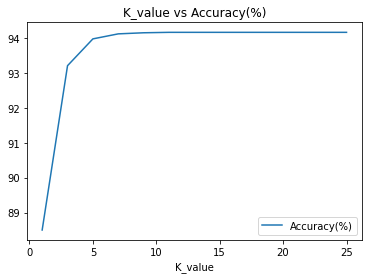

In [115]:
df3.plot(x='K_value',y='Accuracy(%)',title='K_value vs Accuracy(%)')
plt.show()

In [116]:
print(df3['Accuracy(%)'].max())

94.17694571410682


In [117]:
index=df3['Accuracy(%)'].idxmax()
k= df3['K_value'][index]
k

11

In [118]:
knn = KNeighborsClassifier(n_neighbors = k)


In [130]:
from sklearn.metrics import precision_score, recall_score
s = knn.predict(test_x)
# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(test_y, s)
recall = recall_score(test_y, s)
print("precision:", precision)
print("recall :" ,recall )

precision: 0.9417694571410682
recall : 1.0


In [119]:
knn.fit(train_x, train_y)
y_pred = knn.predict(test_predict)


In [120]:
 l =  np.where(y_pred ==1,"yes",'no') 

In [121]:
test["insurance granted by knn"] = l

In [122]:
test

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,Insurance _granted_logistic,insurance_granted_decisiontree,Prediction by naive baise,insurance granted by knn
0,649,0.001,51150,0.0,0.0,0.0,99.890000,7,A,Rural,75,Yes,Yes,Yes,yes
1,81136,0.124,285140,0.0,0.0,0.0,98.930000,19,A,Urban,65,Yes,Yes,Yes,yes
2,70762,1.000,186030,0.0,0.0,0.0,99.061898,2,B,Urban,47,Yes,Yes,Yes,yes
3,53935,0.198,123540,0.0,0.0,0.0,99.000000,11,B,Rural,44,Yes,Yes,Yes,yes
4,15476,0.041,200020,1.0,0.0,0.0,99.170000,14,A,Rural,29,Yes,Yes,Yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,110240,0.0,0.0,0.0,97.520000,9,A,Urban,57,Yes,Yes,Yes,yes
34220,30326,0.157,125090,0.0,0.0,0.0,99.620000,7,A,Rural,53,Yes,Yes,Yes,yes
34221,65749,0.325,196570,0.0,0.0,0.0,98.580000,14,B,Rural,50,Yes,Yes,Yes,yes
34222,65686,0.983,212150,1.0,0.0,1.0,98.880000,10,A,Urban,46,Yes,Yes,Yes,yes


##Accuracy get 94.06% for k = 11